# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm #para qq


In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [7]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [8]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [9]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [10]:
athletes.shape

(11538, 11)

In [11]:
#Questão 1
amostra_1_height = get_sample(athletes, 'height', n=3000).to_frame()
amostra_1_height.head()

,height
1811,1.79
7962,1.81
10280,1.83
317,1.68
6989,2.01


In [12]:
amostra_1_height.describe()

,height
count,3000.000000
mean,1.766780
std,0.112402
min,1.330000
25%,1.690000
50%,1.760000
75%,1.840000
max,2.150000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [13]:
shapiro_amostra_1 = sct.shapiro(amostra_1_height) #Returns W: float (the test statistic), p-value: float, aplha = 0.05
print(shapiro_amostra_1)
shapiro_amostra_1[1] > 0.05

(0.9961519837379456, 5.681722541339695e-07)


False

In [14]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return bool(shapiro_amostra_1[1] >= 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

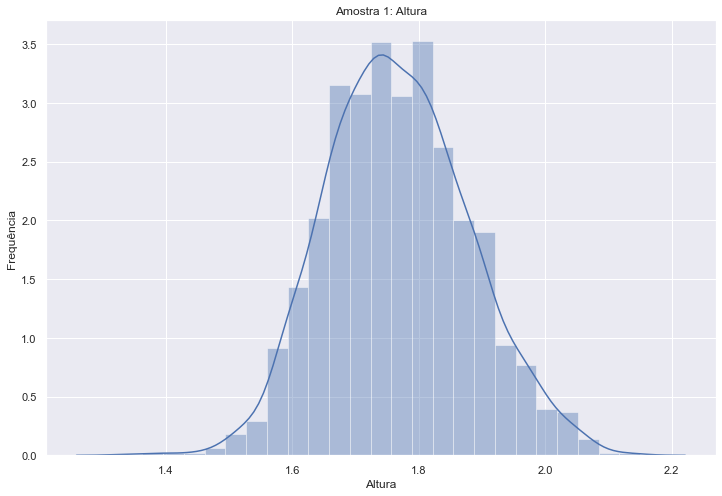

In [99]:
sns.distplot(amostra_1_height, bins=25)
plt.xlabel("Altura")
plt.ylabel("Frequência")
plt.title("Amostra 1: Altura")
plt.show()

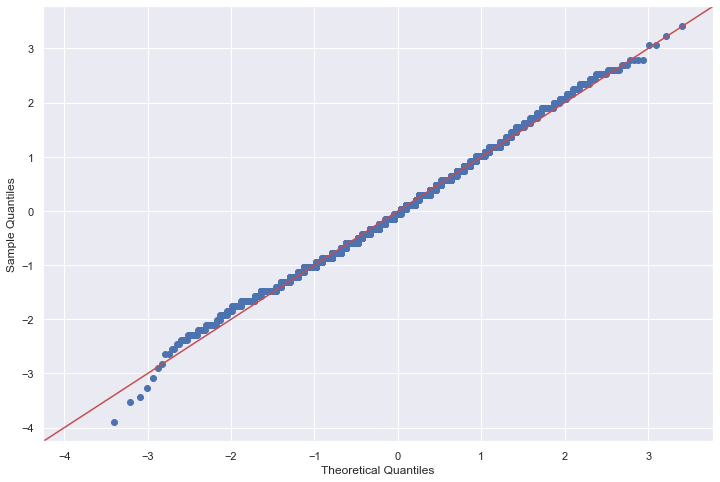

In [111]:
sm.qqplot(data=amostra_1_height.height, fit=True, line="45");

In [17]:
shapiro_amostra_1[1] > 0.0000001

True

In [18]:
#Questão 2
jarque_bera_amostra1 = sct.jarque_bera(amostra_1_height)
print(jarque_bera_amostra1)
jarque_bera_amostra1[1] > 0.05

(13.03363513594265, 0.001478366424594868)


False

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [19]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return bool(jarque_bera_amostra1[1] >= 0.05)

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [20]:
amostra_2_weight = get_sample(athletes, 'weight', n=3000).to_frame()
amostra_2_weight.head()

,weight
2162,80.0
3450,70.0
6886,69.0
3871,66.0
6383,82.0


In [21]:
amostra_2_weight.describe()

,weight
count,3000.000000
mean,72.122667
std,16.366742
min,37.000000
25%,60.000000
50%,70.000000
75%,81.000000
max,160.000000


In [22]:
agostino_pearson_amostra2 = sct.normaltest(amostra_2_weight)
print(agostino_pearson_amostra2)
agostino_pearson_amostra2[1][0] > 0.05

NormaltestResult(statistic=array([510.2465581]), pvalue=array([1.58989229e-111]))


False

In [23]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return bool(agostino_pearson_amostra2[1][0] >= 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

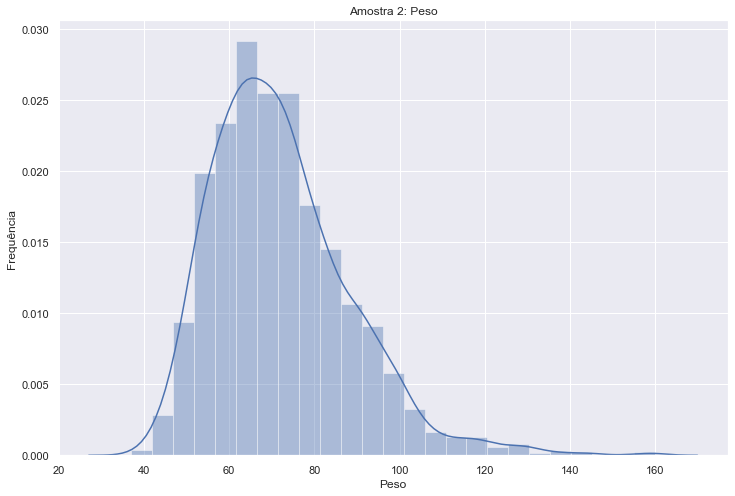

In [24]:
sns.distplot(amostra_2_weight, bins=25);
plt.xlabel("Peso")
plt.ylabel("Frequência")
plt.title("Amostra 2: Peso")
plt.show()

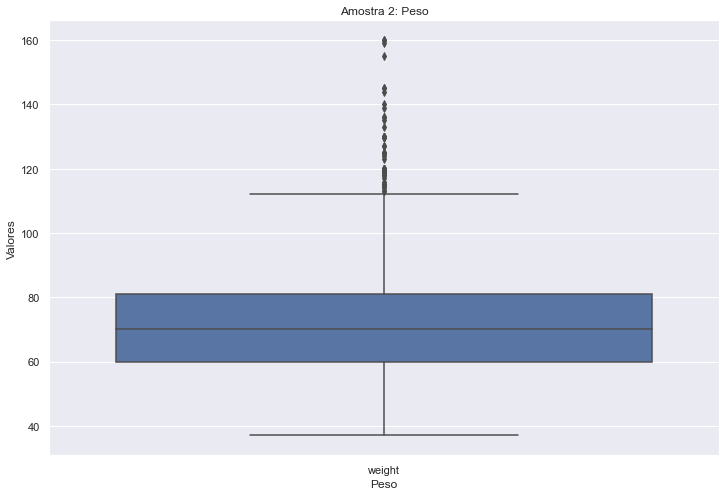

In [25]:
sns.boxplot(data=amostra_2_weight)
plt.xlabel("Peso")
plt.ylabel("Valores")
plt.title("Amostra 2: Peso")
plt.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [26]:
#Questão 4
amostra_2_weight_transformada = np.log10(amostra_2_weight)
amostra_2_weight_transformada

,weight
2162,1.903090
3450,1.845098
6886,1.838849
3871,1.819544
6383,1.913814
...,...
11255,1.799341
9790,1.785330
4127,2.096910
463,1.732394


In [27]:
agostino_pearson_amostra2_transformada = sct.normaltest(amostra_2_weight_transformada)
print(agostino_pearson_amostra2_transformada)
agostino_pearson_amostra2_transformada[1][0] > 0.05

NormaltestResult(statistic=array([45.91534332]), pvalue=array([1.07055721e-10]))


False

In [28]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return bool(agostino_pearson_amostra2_transformada[1][0] >= 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

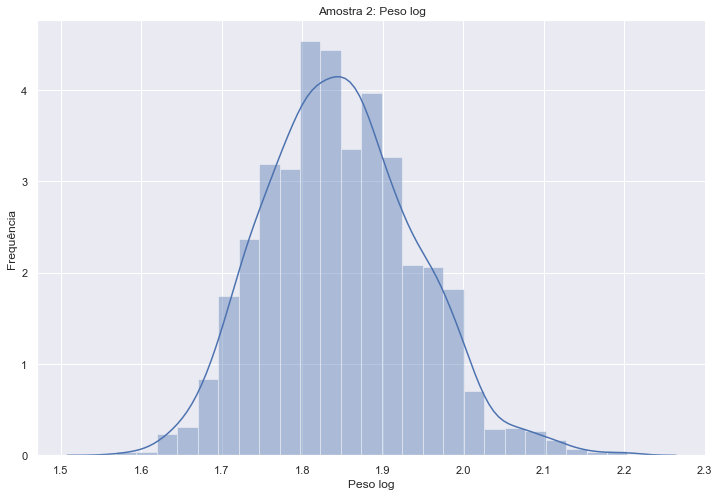

In [29]:
sns.distplot(amostra_2_weight_transformada, bins=25);
plt.xlabel("Peso log")
plt.ylabel("Frequência")
plt.title("Amostra 2: Peso log")
plt.show()

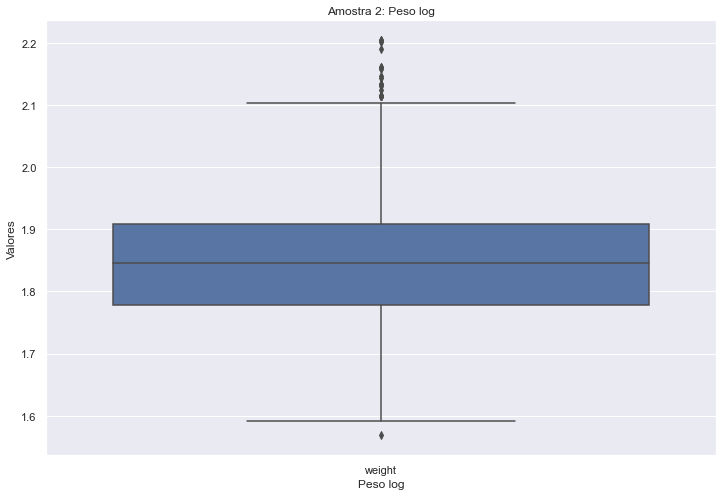

In [143]:
sns.boxplot(data=amostra_2_weight_transformada)
plt.xlabel("Peso log")
plt.ylabel("Valores")
plt.title("Amostra 2: Peso log")
plt.show()

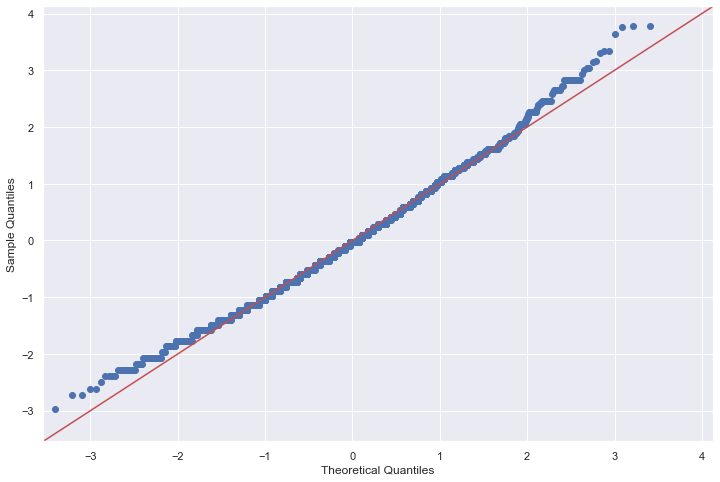

In [109]:
sm.qqplot(amostra_2_weight_transformada.weight, fit=True, line="45");

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [31]:
bra = athletes[athletes.nationality == 'BRA']
usa = athletes[athletes.nationality == 'USA']
can = athletes[athletes.nationality == 'CAN']


In [32]:
bra.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
79,236523132,Adam Imer,BRA,male,8/18/89,1.82,88.0,hockey,0,0,0
106,993710181,Adenizia da Silva,BRA,female,12/18/86,1.87,65.0,volleyball,0,0,0
109,930618704,Adilson da Silva,BRA,male,1/24/72,1.70,79.0,golf,0,0,0
114,787208883,Adrian Baches,BRA,male,4/7/90,1.84,83.0,aquatics,0,0,0
128,80367651,Adriana Aparecida da Silva,BRA,female,7/22/81,1.66,52.0,athletics,0,0,0


In [33]:
bra.describe()

,id,height,weight,gold,silver,bronze
count,4.850000e+02,476.000000,466.000000,485.000000,485.000000,485.000000
mean,5.124646e+08,1.764034,72.693133,0.076289,0.016495,0.012371
std,2.929673e+08,0.117388,16.149777,0.265734,0.142788,0.110650
min,2.593240e+06,1.330000,31.000000,0.000000,0.000000,0.000000
25%,2.677965e+08,1.680000,60.000000,0.000000,0.000000,0.000000
50%,5.245187e+08,1.755000,70.000000,0.000000,0.000000,0.000000
75%,7.540883e+08,1.840000,82.000000,0.000000,0.000000,0.000000
max,9.993895e+08,2.110000,160.000000,1.000000,2.000000,1.000000


In [34]:
bra.isna().sum()

id              0
name            0
nationality     0
sex             0
dob             0
height          9
weight         19
sport           0
gold            0
silver          0
bronze          0
dtype: int64

In [35]:

bra = bra.dropna(subset=['height'])
bra.isna().sum()


id              0
name            0
nationality     0
sex             0
dob             0
height          0
weight         10
sport           0
gold            0
silver          0
bronze          0
dtype: int64

In [36]:
usa.head()


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0
104,259002430,Adeline Maria Gray,USA,female,1/15/91,1.73,77.0,wrestling,0,0,0


In [37]:
usa.describe()

,id,height,weight,gold,silver,bronze
count,5.670000e+02,560.000000,552.000000,567.000000,567.000000,567.000000
mean,5.070661e+08,1.787768,74.311594,0.245150,0.095238,0.125220
std,2.935764e+08,0.118962,17.408532,0.549533,0.316945,0.336552
min,2.538424e+06,1.450000,42.000000,0.000000,0.000000,0.000000
25%,2.416298e+08,1.710000,61.000000,0.000000,0.000000,0.000000
50%,5.219061e+08,1.780000,72.000000,0.000000,0.000000,0.000000
75%,7.698823e+08,1.880000,83.000000,0.000000,0.000000,0.000000
max,9.987105e+08,2.210000,157.000000,5.000000,2.000000,2.000000


In [38]:
usa.isna().sum()

id              0
name            0
nationality     0
sex             0
dob             0
height          7
weight         15
sport           0
gold            0
silver          0
bronze          0
dtype: int64

In [39]:
usa = usa.dropna(subset=['height'])
usa.isna().sum()


id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         8
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [40]:
can.head()


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
77,136977152,Adam Froese,CAN,male,8/13/91,1.82,81.0,hockey,0,0,0
92,983411298,Adam van Koeverden,CAN,male,1/29/82,1.82,85.0,canoe,0,0,0
238,769580282,Akeem Haynes,CAN,male,3/11/92,1.68,71.0,athletics,0,0,1
332,84230211,Alena Sharp,CAN,female,3/7/81,1.68,69.0,golf,0,0,0


In [41]:
can.describe()

,id,height,weight,gold,silver,bronze
count,3.210000e+02,320.000000,317.000000,321.000000,321.000000,321.000000
mean,5.190636e+08,1.758594,70.025237,0.012461,0.012461,0.190031
std,2.896166e+08,0.118036,14.202179,0.111105,0.111105,0.423557
min,9.175796e+06,1.450000,46.000000,0.000000,0.000000,0.000000
25%,2.618870e+08,1.670000,59.000000,0.000000,0.000000,0.000000
50%,5.139275e+08,1.750000,68.000000,0.000000,0.000000,0.000000
75%,7.819794e+08,1.830000,79.000000,0.000000,0.000000,0.000000
max,9.950882e+08,2.080000,140.000000,1.000000,1.000000,2.000000


In [42]:
can.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         1
weight         4
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [43]:
can = can.dropna(subset=['height'])
can.isna().sum()


id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         3
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [50]:
#equal_var = False para variâncias diferentes
bra_usa_ttest_height = sct.ttest_ind(bra['height'], usa['height'], equal_var=False)
bra_usa_ttest_height

Ttest_indResult(statistic=-3.2232436467501553, pvalue=0.001308004183014406)

In [45]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return bool(bra_usa_ttest_height.pvalue >= 0.05)

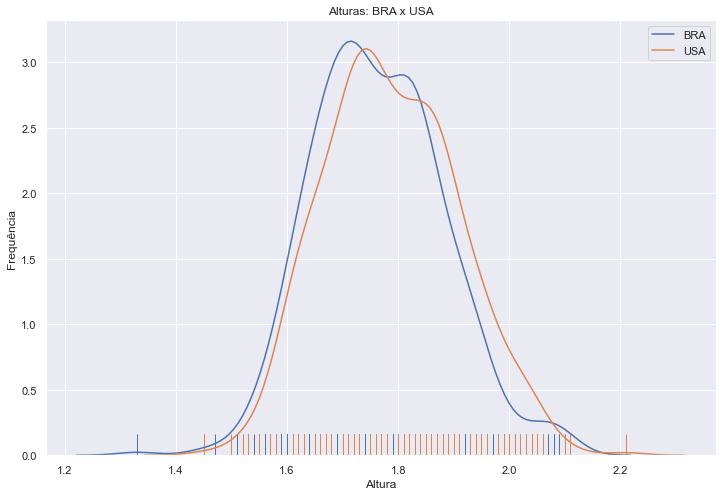

In [122]:
sns.distplot(bra['height'], bins=25, hist=False, rug=True, label='BRA')
sns.distplot(usa['height'], bins=25, hist=False, rug=True, label='USA')

plt.xlabel("Altura")
plt.ylabel("Frequência")
plt.title("Alturas: BRA x USA")
plt.show()

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [53]:
bra_can_ttest_height = sct.ttest_ind(bra['height'], can['height'], equal_var=False)
bra_can_ttest_height

Ttest_indResult(statistic=0.638930491436537, pvalue=0.5230827295443041)

In [47]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return bool(bra_can_ttest_height.pvalue >= 0.05)

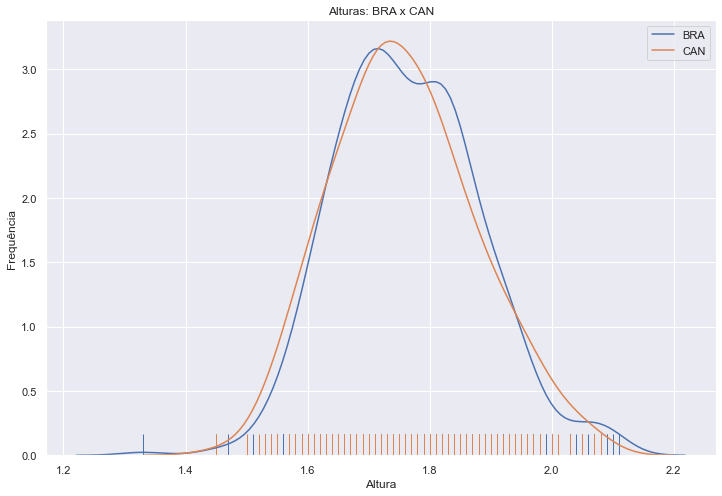

In [119]:
sns.distplot(bra['height'], bins=25, hist=False, rug=True, label='BRA')
sns.distplot(can['height'], bins=25, hist=False, rug=True, label='CAN')

plt.xlabel("Altura")
plt.ylabel("Frequência")
plt.title("Alturas: BRA x CAN")
plt.show()

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [114]:
usa_can_ttest_height = sct.ttest_ind(usa['height'], can['height'], equal_var=False)
print(usa_can_ttest_height)
print(float(np.round(usa_can_ttest_height.pvalue, 8)))

Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347388888)
0.00046601


In [113]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return float(np.round(usa_can_ttest_height.pvalue, 8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [96]:
#Testes para entender as informações das funções

usa_can_ttest_height_eq_var = sct.ttest_ind(usa['height'], can['height'], equal_var=True)
print(usa_can_ttest_height_eq_var)
#sct.t.isf(.05 / 2, gl) 
#sct.t.isf(0.00046601/2, gl)
#sct.t.sf(1.9626695531494305, gl, loc=0, scale=1) *2   
#sct.t.sf(3.516987632488539, gl, loc=0, scale=1)*2
#sct.t.pdf(usa_can_ttest_height.statistic, 13)

#grau de liberdade para o teste t independente com variancias semelhantes: df = n1 + n2 - 2
gl = len(usa) + len(can) - 2
print(f"Graus de liberdade: {gl}")
q7_sf = sct.t.sf(usa_can_ttest_height_eq_var.statistic, gl)*2 #Para Hipótese Bicaudal
print(q7_sf)

Ttest_indResult(statistic=3.5094939427693164, pvalue=0.00047178571523938005)
Graus de liberdade: 878
0.00047178571523938005


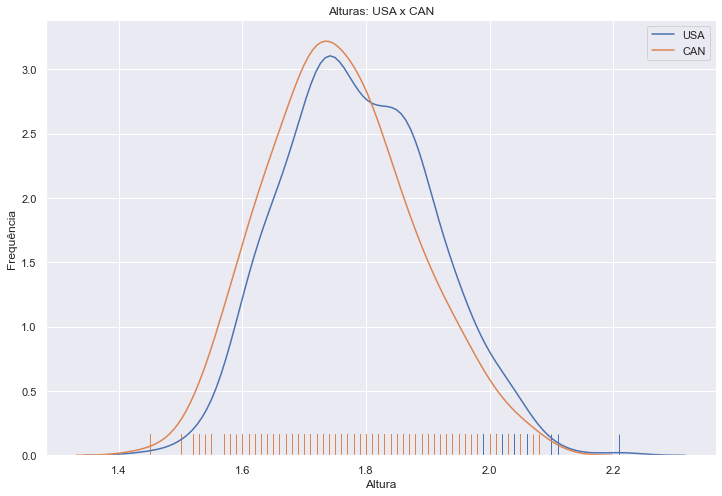

In [118]:
sns.distplot(usa['height'], bins=25, hist=False, rug=True, label='USA')
sns.distplot(can['height'], bins=25, hist=False, rug=True, label='CAN')

plt.xlabel("Altura")
plt.ylabel("Frequência")
plt.title("Alturas: USA x CAN")
plt.show()

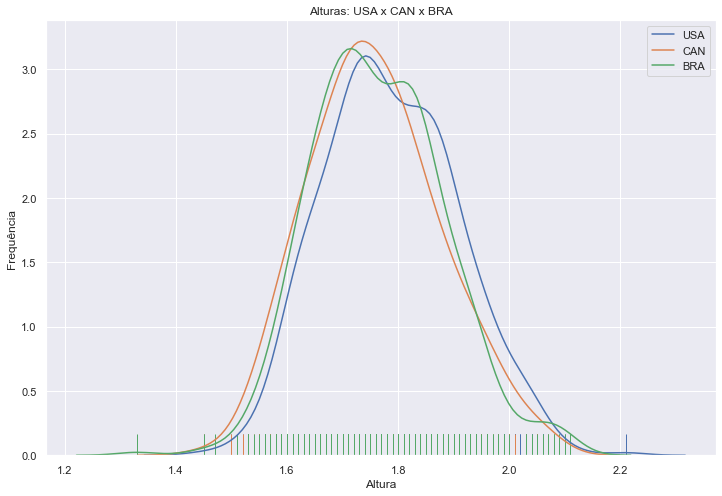

In [125]:

sns.distplot(usa['height'], bins=25, hist=False, rug=True, label='USA')
sns.distplot(can['height'], bins=25, hist=False, rug=True, label='CAN')
sns.distplot(bra['height'], bins=25, hist=False, rug=True, label='BRA')

plt.xlabel("Altura")
plt.ylabel("Frequência")
plt.title("Alturas: USA x CAN x BRA")
plt.show()